In [1]:
# Librerías para BigQuery
from google.cloud import bigquery
# Librerías adicionales para manejo de archivos
from google.colab import files
# Autenticación en Google Cloud
from google.colab import auth
auth.authenticate_user()
# Configuración de BigQuery (puedes añadir tu project_id aquí)
project_id = 'datalab-433117'
client = bigquery.Client(project=project_id)


In [2]:
from google.colab import auth
from google.cloud import bigquery

# Autenticación en Google Cloud
auth.authenticate_user()

# Configuración del proyecto de Google Cloud
project_id = 'datalab-433117'
client = bigquery.Client(project=project_id)

# Consulta en BigQuery para obtener los datos de la tabla 'new_amazon_review'
query = """
SELECT *
FROM `datalab-433117.dataset.tabla_unificada`
"""

# Ejecuta la consulta y convierte los resultados en un DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Muestra las primeras filas del DataFrame
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,primary_category,user_names,user_count,review_titles,review_content,img_link,product_link,rating,rating_count,avg_sentiment,title_sentiment_label
0,B08L879JSN,Acer EK220Q 21.5 Inch (54.61 cm) Full HD (1920...,Computers&Accessories|Monitors,6299.0,13750.0,0.54,21.5 Inch VA Panel Full HD 1920 X 1080 Resolut...,Computers&Accessories,"Yatharth Patil, Alpesh Rathva, Sathish, Muzamm...",8,"its a good 1080 monitor, price relaetd issue, ...",Good product i am giving this review after 2mo...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Acer-Features-Bluelight-...,4.2,2014,0.283688,Neutral
1,B07JF9B592,MAONO AU-400 Lavalier Auxiliary Omnidirectiona...,MusicalInstruments|Microphones|Condenser,478.0,699.0,0.32,4-pole jack is compatible for laptop which has...,MusicalInstruments,"Dinesh S, Shahrukh, Manish Rautela, ˢᴰ82ˢᶜ ✔️,...",8,"Good for price, In budget, Avrage in budget ra...",at Rs.319 it's a great deal. I use it for mobi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Maono-AU-400-Lavalier-Mi...,3.8,20218,0.291813,Neutral
2,B096VF5YYF,"boAt Xtend Smartwatch with Alexa Built-in, 1.6...",Electronics|WearableTechnology|SmartWatches,2999.0,7990.0,0.62,Alexa- Alexa built-in Voice Assistant that set...,Electronics,"Mohammed.afsar, Divya Devkar, archit, Vaishnav...",8,"Wach not working, 👍, NOt worth the money, I do...",Review OverviewAverage2.7The Boat today launch...,https://m.media-amazon.com/images/I/41pfjyUPZL...,https://www.amazon.in/boAt-Smartwatch-Multiple...,4.1,48449,0.221650,Neutral
3,B0972BQ2RS,Fire-Boltt India's No 1 Smartwatch Brand Ring ...,Electronics|WearableTechnology|SmartWatches,2499.0,9999.0,0.75,Fire-Boltt is India' No 1 Wearable Watch Brand...,Electronics,"chetan J, Ravikumar_Mani_INDIA, Deepak Vincent...",8,"elegant look, Descent looking, There is a bit...","Great watch, good features. Easy and simple to...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Fire-Boltt-Smartwatch-Mo...,4.1,42139,0.147500,Neutral
4,B0BD92GDQH,"OnePlus Nord Watch with 1.78” AMOLED Display, ...",Electronics|WearableTechnology|SmartWatches,4999.0,6999.0,0.29,"【1.78"" AMOLED display】500nit peak brightness &...",Electronics,"lattaben parikh, Varun Nair, SYED SHABEENA, Si...",8,"Got this watch at 4499, Premium build watch wi...",I really suprise there is no Bluetooth calling...,https://m.media-amazon.com/images/I/31OgHTags6...,https://www.amazon.in/OnePlus-Display-Refresh-...,3.8,758,-0.055013,Neutral


# **Correlación de Variables**

---



---



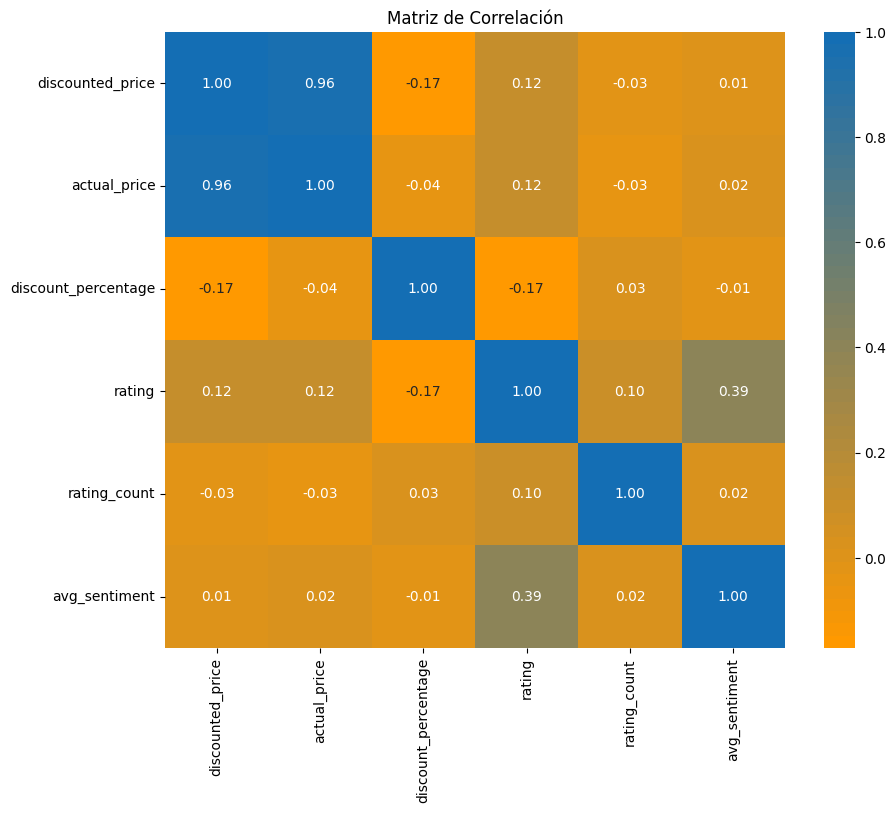

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Selecciona las columnas para calcular la matriz de correlación
columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'avg_sentiment']
correlation_matrix = df[columns].corr()

# Crear un mapa de calor con una paleta personalizada basada en los colores de Amazon
amazon_cmap = LinearSegmentedColormap.from_list("amazon", ['#FF9900', '#146EB4'], N=50)

# Mostrar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=amazon_cmap, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()
